In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Análisis de vuelos

In [33]:
flights = pd.read_csv(r"C:\Users\jdami\OneDrive\Documents\GitHub\Datathon-vivaaero\train_test\Filghts_train_test.csv")

c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


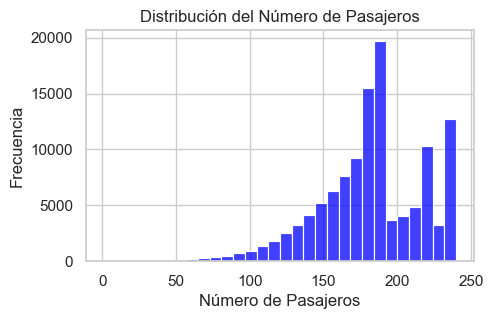

In [34]:
sns.set_theme(style="whitegrid")

# Crear un histograma
plt.figure(figsize=(5, 3))
sns.histplot(flights['Passengers'], kde=False, color='blue', bins=30)
plt.title('Distribución del Número de Pasajeros')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
plt.show()

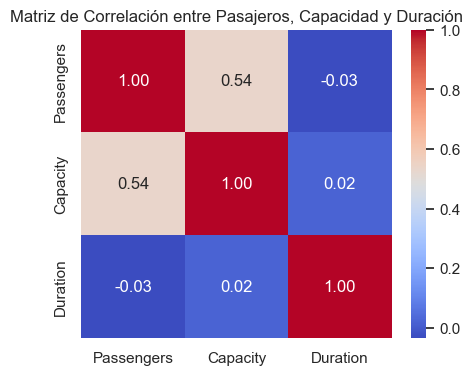

In [35]:
plt.figure(figsize=(5, 4))
sns.heatmap(flights[['Passengers', 'Capacity', 'Duration']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Pasajeros, Capacidad y Duración')
plt.show()

c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


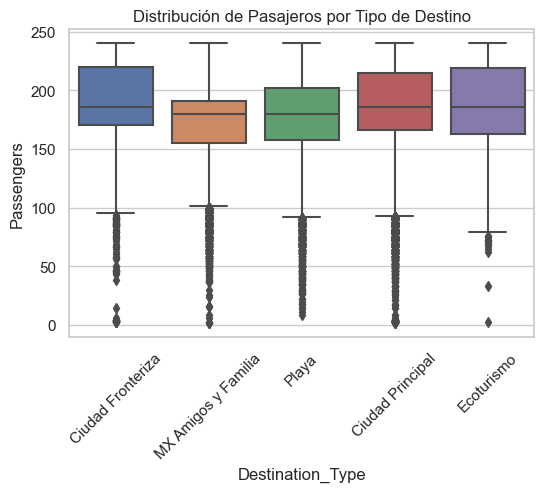

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Destination_Type', y='Passengers', data=flights)
plt.xticks(rotation=45)
plt.title('Distribución de Pasajeros por Tipo de Destino')
plt.show()

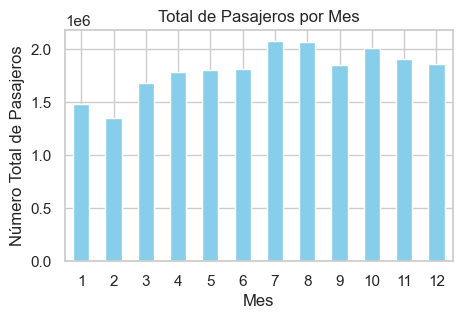

In [37]:
# Usando 'STD' que es la columna de fecha de salida del vuelo
flights['Month'] = pd.to_datetime(flights['STD']).dt.month
monthly_passengers = flights.groupby('Month')['Passengers'].sum()

plt.figure(figsize=(5,3))
monthly_passengers.plot(kind='bar', color='skyblue')
plt.title('Total de Pasajeros por Mes')
plt.xlabel('Mes')
plt.ylabel('Número Total de Pasajeros')
plt.xticks(rotation=0)
plt.show()

In [7]:
# Calcular el IQR
Q1 = flights['Passengers'].quantile(0.25)
Q3 = flights['Passengers'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos para excluir outliers
cleaned_flights = flights[(flights['Passengers'] >= lower_limit) & (flights['Passengers'] <= upper_limit)]

# Opcional: Ver la cantidad de datos antes y después de eliminar outliers
print(f"Original Data: {flights.shape[0]} rows")
print(f"Data without Outliers: {cleaned_flights.shape[0]} rows")

Original Data: 118837 rows
Data without Outliers: 117223 rows


c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


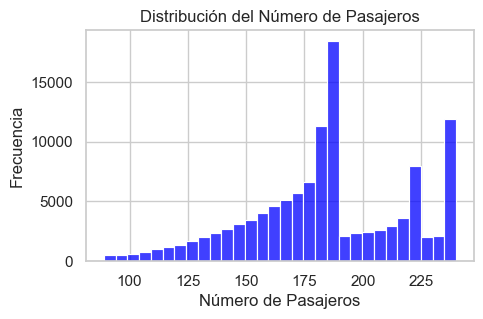

In [8]:
sns.set_theme(style="whitegrid")

# Crear un histograma
plt.figure(figsize=(5,3))
sns.histplot(cleaned_flights['Passengers'], kde=False, color='blue', bins=30)
plt.title('Distribución del Número de Pasajeros')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
plt.show()

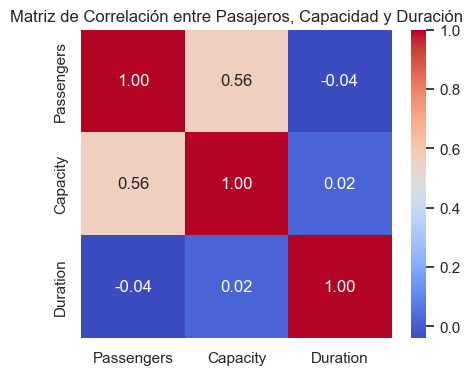

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(cleaned_flights[['Passengers', 'Capacity', 'Duration']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Pasajeros, Capacidad y Duración')
plt.show()

c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


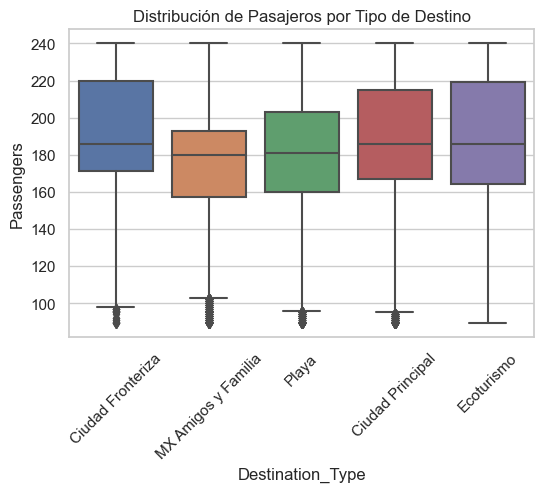

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Destination_Type', y='Passengers', data=cleaned_flights)
plt.xticks(rotation=45)
plt.title('Distribución de Pasajeros por Tipo de Destino')
plt.show()

C:\Users\jdami\AppData\Local\Temp\ipykernel_36776\585117171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_flights['Month'] = pd.to_datetime(cleaned_flights['STD']).dt.month


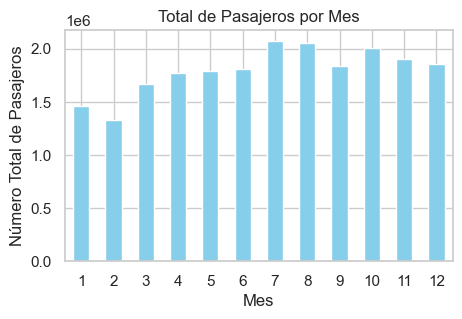

In [11]:
monthly_passengers = cleaned_flights.groupby('Month')['Passengers'].sum()

plt.figure(figsize=(5,3))
monthly_passengers.plot(kind='bar', color='skyblue')
plt.title('Total de Pasajeros por Mes')
plt.xlabel('Mes')
plt.ylabel('Número Total de Pasajeros')
plt.xticks(rotation=0)
plt.show()

In [12]:
cleaned_flights['STD'] = pd.to_datetime(cleaned_flights['STD'])

# Extraer características como día de la semana y hora del día
cleaned_flights['Day_of_Week'] = cleaned_flights['STD'].dt.dayofweek
cleaned_flights['Hour_of_Day'] = cleaned_flights['STD'].dt.hour

C:\Users\jdami\AppData\Local\Temp\ipykernel_36776\147238346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_flights['STD'] = pd.to_datetime(cleaned_flights['STD'])
C:\Users\jdami\AppData\Local\Temp\ipykernel_36776\147238346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_flights['Day_of_Week'] = cleaned_flights['STD'].dt.dayofweek
C:\Users\jdami\AppData\Local\Temp\ipykernel_36776\147238346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [13]:
# Seleccionar variables incluyendo categóricas y numéricas
X = cleaned_flights[['Capacity', 'Day_of_Week', 'Hour_of_Day', 'Month', 'Destination_Type', 'DepartureStation', 'ArrivalStation', 'Aeronave']]
y = cleaned_flights['Passengers']

# Codificar variables categóricas
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Crear el modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Mean Absolute Error (MAE): 14.57494249649097
Mean Squared Error (MSE): 422.6546948002975
Root Mean Squared Error (RMSE): 20.55856743064306
                Feature  Importance
0              Capacity    0.340191
3                 Month    0.099757
1           Day_of_Week    0.076966
2           Hour_of_Day    0.061486
24  DepartureStation_AT    0.028567
..                  ...         ...
55    ArrivalStation_AI    0.000036
14  DepartureStation_AI    0.000027
80    ArrivalStation_BI    0.000009
39  DepartureStation_BI    0.000006
10  DepartureStation_AC    0.000005

[175 rows x 2 columns]


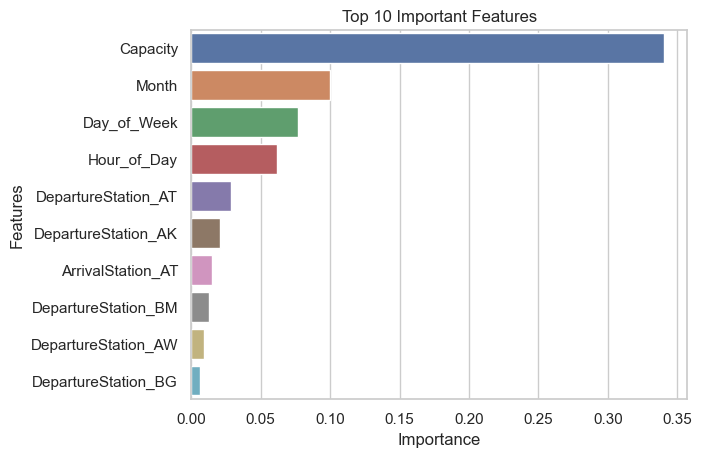

In [14]:
# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Obtener importancia de las características
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar características por importancia
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

# Visualizar las 10 características más importantes
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Predicción del primer mes del 2024

In [26]:
test_data = pd.read_csv(r"C:\Users\jdami\OneDrive\Documents\GitHub\Datathon-vivaaero\pred\Filghts_pred.csv")
test_data = test_data[test_data['STD'] <= '2024-01-31']

test_data['Day_of_Week'] = pd.to_datetime(test_data['STD']).dt.dayofweek
test_data['Hour_of_Day'] = pd.to_datetime(test_data['STD']).dt.hour
test_data = pd.get_dummies(test_data)

final_columns = X_train.columns  # Columnas usadas en el entrenamiento
test_data = test_data.reindex(columns=final_columns, fill_value=0)

# Hacer predicciones
predictions = model.predict(test_data)

test_data = pd.read_csv(r"C:\Users\jdami\OneDrive\Documents\GitHub\Datathon-vivaaero\pred\Filghts_pred.csv")
test_data = test_data[test_data['STD'] <= '2024-01-31']
test_data['Passengers'] = predictions
test_data['Passengers'] = test_data['Passengers'].map(lambda x: round(x))
test_data.head(10)

c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jdami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Duration,Hour of Day,Ocupancia
1,bb319ee8f62b5ae38e6f6da4dbff03cb,XA-VAV,BA,AB,Playa,Ciudad Principal,2024-01-12 08:20:00,2024-01-12 09:20:00,186,178,NaN,1.000000,8,NaN
12,31659639d39b84bc59149bcc3f6d4e7a,XA-VAI,AT,BS,Playa,Ciudad Principal,2024-01-11 06:50:00,2024-01-11 07:55:00,180,159,NaN,1.083333,6,NaN
13,17718d43f541b4e944c5d8bd5b44e6a6,XA-VXO,AW,AX,MX Amigos y Familia,Ciudad Principal,2024-01-25 11:05:00,2024-01-25 11:55:00,240,183,NaN,0.833333,11,NaN
16,43cfcc874d1f88dd5562d8b4657d1559,XA-VIT,AO,AR,Playa,Ciudad Principal,2024-01-12 12:10:00,2024-01-12 12:50:00,186,176,NaN,0.666667,12,NaN
19,10099a86c19b730babcfcc371c6bd98c,XA-VYD,AT,BS,Playa,Ciudad Principal,2024-01-06 14:55:00,2024-01-06 16:00:00,180,177,NaN,1.083333,14,NaN
22,14dbb8e29899e4642d61ca75674ed7f5,XA-VYF,BA,AZ,Ciudad Fronteriza,Ciudad Principal,2024-01-17 07:35:00,2024-01-17 09:20:00,180,173,NaN,1.750000,7,NaN
34,5c0f447d2fa90f0e4356c7c0221ca18e,XA-VIE,BA,BS,Playa,Ciudad Principal,2024-01-01 08:20:00,2024-01-01 09:25:00,186,167,NaN,1.083333,8,NaN
54,e5c8f48d7161779bdc89391849ddfb3d,XA-VBZ,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2024-01-08 00:05:00,2024-01-08 05:05:00,236,126,NaN,5.000000,0,NaN
56,c80c55062dfde80ce783fefd70d833da,XA-VIY,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2024-01-22 00:05:00,2024-01-22 05:00:00,186,144,NaN,4.916667,0,NaN
62,d9a5daa451926dcf733ec5fb966ea71a,XA-VCC,AT,BO,MX Amigos y Familia,Ciudad Principal,2024-01-11 05:40:00,2024-01-11 07:25:00,230,184,NaN,1.750000,5,NaN


In [31]:
test_data.to_csv(r"C:\Users\jdami\OneDrive\Documents\GitHub\Datathon-vivaaero\pred\Filghts_pred.csv", index=False)

### Guardado del modelo

In [28]:
# Guardar el modelo en un archivo binario
with open('Modelo_Passengers.pkl', 'wb') as file:
    pickle.dump(model, file)